In [46]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.simplefilter('ignore')

In [2]:
# take a look a single csv
dataset = pd.read_csv('./datasets/goodreads/book1-100k.csv')
dataset.head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [2]:

from pathlib import Path
full_dataset = pd.concat([pd.read_csv(str(x.resolve())) for x in Path("./datasets/goodreads").glob("*k.csv")])
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 34758
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   Name                   object 
 2   Authors                object 
 3   ISBN                   object 
 4   Rating                 float64
 5   PublishYear            int64  
 6   PublishMonth           int64  
 7   PublishDay             int64  
 8   Publisher              object 
 9   RatingDist5            object 
 10  RatingDist4            object 
 11  RatingDist3            object 
 12  RatingDist2            object 
 13  RatingDist1            object 
 14  RatingDistTotal        object 
 15  CountsOfReview         int64  
 16  Language               object 
 17  PagesNumber            float64
 18  Description            object 
 19  pagesNumber            float64
 20  Count of text reviews  float64
dtypes: float64(4), int64(5), object(12)
memory usage: 310.6+

In [4]:
# turn the RatingDist columns into itegers by splitting of the first part.
for i in range(1,6):
    full_dataset['RatingDist'+str(i)] = full_dataset['RatingDist'+str(i)].str.split(':').str[1]
full_dataset["RatingDistTotal"] = full_dataset["RatingDistTotal"].str.split(':').str[1]

to_convert = ["RatingDist1", "RatingDist2", "RatingDist3", "RatingDist4", "RatingDist5", "RatingDistTotal"]
for col in to_convert:
    full_dataset[col] = full_dataset[col].astype(int)

full_dataset.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 34758
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   Name                   object 
 2   Authors                object 
 3   ISBN                   object 
 4   Rating                 float64
 5   PublishYear            int64  
 6   PublishMonth           int64  
 7   PublishDay             int64  
 8   Publisher              object 
 9   RatingDist5            int64  
 10  RatingDist4            int64  
 11  RatingDist3            int64  
 12  RatingDist2            int64  
 13  RatingDist1            int64  
 14  RatingDistTotal        int64  
 15  CountsOfReview         int64  
 16  Language               object 
 17  PagesNumber            float64
 18  Description            object 
 19  pagesNumber            float64
 20  Count of text reviews  float64
dtypes: float64(4), int64(11), object(6)
memory usage: 310.6+

In [5]:
# Thanks to : https://www.kaggle.com/aantonova/some-new-risk-and-clusters-feature
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

reduce_mem_usage(full_dataset)

Mem. usage decreased to 187.05 Mb (39.8% reduction)


,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,pagesNumber,Count of text reviews
0,1900511,Barbarossa,Christopher Ailsby,1840138009,3.000000,2007,4,1,New Line Books,0,...,1,0,0,1,0,NaN,192.0,"On 22 June 1941, Adolf Hitler launched Operati...",NaN,NaN
1,1900512,Collector's Guide to German World War II: Comb...,Christopher Ailsby,0781802253,0.000000,1994,7,1,Hippocrene Books,0,...,0,0,0,0,0,NaN,160.0,NaN,NaN,NaN
2,1900514,Images of Barbarossa,Christopher Ailsby,0711028257,3.500000,2001,1,25,Ian Allan Ltd,0,...,2,1,0,8,0,NaN,256.0,"On 22 June 1941, Adolf Hitler launched Operati...",NaN,NaN
3,1900520,Romania After 2000: Five New Romanian Plays,Daniel Charles Gerould,0595436560,4.000000,2007,9,1,Martin E. Segal Theatre Center Publications,1,...,1,0,0,6,0,NaN,226.0,The first anthology of new Romanian Drama publ...,NaN,NaN
4,1900521,Global Foreigners: An Anthology of Plays,Saviana Stănescu,1905422423,4.601562,2006,12,7,Seagull Books,4,...,1,0,0,5,0,NaN,320.0,"In Waxing West, Daniella, newly arrived in the...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34754,1499988,Irish Folk and Fairy Tales Omnibus Edition,Michael Scott,0751508861,4.191406,1989,24,8,Sphere,140,...,42,13,4,311,10,NaN,NaN,"Here, collected in one volume, are tales and l...",637.0,10.0
34755,1499990,Robin Hood: The Shaping of the Legend,Jeffrey L. Singman,0313301018,3.000000,1998,23,7,Praeger,0,...,1,0,0,1,0,NaN,NaN,Among the narrative traditions of the Middle A...,224.0,0.0
34756,1499991,International Business: Competing in the Globa...,Charles W.L. Hill,0073102555,3.730469,2005,1,12,Irwin/McGraw-Hill,105,...,89,26,19,345,8,NaN,NaN,NaN,740.0,8.0
34757,1499992,Competing on Value,Mack Hanan,0814450369,3.500000,1991,22,4,Amacom,2,...,2,2,0,8,1,NaN,NaN,Presents a new approach to selling that emphas...,220.0,1.0


In [6]:
full_dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 34758
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1850310 non-null  int32  
 1   Name                   1850310 non-null  object 
 2   Authors                1850310 non-null  object 
 3   ISBN                   1844387 non-null  object 
 4   Rating                 1850310 non-null  float16
 5   PublishYear            1850310 non-null  int32  
 6   PublishMonth           1850310 non-null  int8   
 7   PublishDay             1850310 non-null  int8   
 8   Publisher              1832484 non-null  object 
 9   RatingDist5            1850310 non-null  int32  
 10  RatingDist4            1850310 non-null  int32  
 11  RatingDist3            1850310 non-null  int32  
 12  RatingDist2            1850310 non-null  int32  
 13  RatingDist1            1850310 non-null  int32  
 14  RatingDistTotal     

Routledge                       37645
Springer                        35810
Oxford University Press, USA    26988
Cambridge University Press      25958
Wiley                           12139
                                ...  
Douglas & McIntyre Ltd.             1
Brittannia Games Designs            1
France loisirs                      1
Transformation Publishing           1
Channel Four Books                  1
Name: Publisher, Length: 79422, dtype: int64


<AxesSubplot:ylabel='Frequency'>

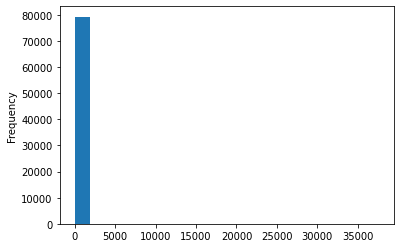

In [27]:
# look into the publishers
print(full_dataset['Publisher'].value_counts())
full_dataset['Publisher'].value_counts().plot(kind='hist', bins=20)


In [28]:
# clearly publishers usually only get one book in this, so we need to remember to encode them properly

In [30]:
# look at the dates
full_dataset[["PublishYear", "PublishMonth", "PublishDay"]].describe()

,PublishYear,PublishMonth,PublishDay
count,1.850310e+06,1.850310e+06,1.850310e+06
mean,1.997841e+03,7.700550e+00,7.987211e+00
std,8.789461e+01,7.756940e+00,8.431777e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.993000e+03,1.000000e+00,1.000000e+00
50%,2.000000e+03,6.000000e+00,5.000000e+00
75%,2.005000e+03,1.100000e+01,1.100000e+01
max,6.553500e+04,3.100000e+01,3.100000e+01


In [7]:
full_dataset[full_dataset["PublishMonth"] > 12].shape

(297991, 21)

In [8]:
# publish day looks wrong so lets just drop that column as I doubt the day of publishing is very important
full_dataset.drop(columns=["PublishDay"], inplace=True)

In [9]:
full_dataset[(full_dataset['PublishYear'] < 1400) | (full_dataset['PublishYear'] > 2020)]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,pagesNumber,Count of text reviews
9549,1922038,Teaching Children With Autism To Mind Read: A ...,Patricia Howlin,0470093226,3.890625,2022,1,Wiley,11,13,8,2,1,35,0,NaN,192.0,It is now established that difficulties in und...,NaN,NaN
29198,1967481,"Le grand carnage (Sin City, #3)",Frank Miller,2878270746,4.109375,200,8,NaN,6025,5954,2766,490,180,15415,0,fre,164.0,La vieille ville de Sin City est une forteress...,NaN,NaN
38543,1988675,Persuaders-In-Chief: The Presidents and Propag...,Nancy Snow,0415950058,0.000000,2021,1,Routledge,0,0,0,0,0,0,0,NaN,208.0,"In the wake of September 11th, the question wa...",NaN,NaN
31274,1694730,Global Politics: A New Introduction,Jenny Edkins,0415431301,3.619141,20099,1,Routledge,15,21,21,3,4,64,0,NaN,NaN,Global Politics: A New Introduction is an inno...,568.0,0.0
9888,718317,"The Possessed and the Dispossessed: Spirits, I...",Lesley A. Sharp,0520080017,3.500000,2021,8,University of California Press,0,1,1,0,0,2,0,NaN,NaN,"This finely drawn portrait of a complex, polyc...",399.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222257,4670608,The Power of he Center,Daniel D. Arnheim,0520062418,4.000000,65535,4,NaN,0,3,0,0,0,3,1,NaN,256.0,"Using a wealth of examples, Arnheim considers ...",NaN,NaN
278158,4838633,فراز و فرود جنبش کردی,حمیدرضا جلائی‌پور,NaN,0.000000,1385,6,لوح فکر,0,0,0,0,0,0,0,NaN,236.0,NaN,NaN,NaN
25597,42574,The Water Babies: A Fairy Tale for a Land Baby,Charles Kingsley,0543956121,3.419922,3002,21,Adamant Media Corporation,1711,1929,2379,1132,494,7645,0,NaN,NaN,NaN,372.0,NaN
44378,76978,"The Secret of the Old Mill (The Hardy Boys, #3)",Franklin W. Dixon,0448089033,3.859375,162,1,Grosset & Dunlap,2036,2173,2095,333,69,6706,209,eng,NaN,NaN,174.0,NaN


In [10]:
# ok so lets drop those
full_dataset = full_dataset[full_dataset['PublishYear'] > 1400]
full_dataset = full_dataset[full_dataset['PublishYear'] < 2022]
full_dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850262 entries, 0 to 34758
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1850262 non-null  int32  
 1   Name                   1850262 non-null  object 
 2   Authors                1850262 non-null  object 
 3   ISBN                   1844343 non-null  object 
 4   Rating                 1850262 non-null  float16
 5   PublishYear            1850262 non-null  int32  
 6   PublishMonth           1850262 non-null  int8   
 7   Publisher              1832442 non-null  object 
 8   RatingDist5            1850262 non-null  int32  
 9   RatingDist4            1850262 non-null  int32  
 10  RatingDist3            1850262 non-null  int32  
 11  RatingDist2            1850262 non-null  int32  
 12  RatingDist1            1850262 non-null  int32  
 13  RatingDistTotal        1850262 non-null  int32  
 14  CountsOfReview      

In [45]:
# plot rating distributions
full_dataset[["RatingDist1", "RatingDist2", "RatingDist3", "RatingDist4", "RatingDist5", "RatingDistTotal"]].describe()

,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal
count,1.850262e+06,1.850262e+06,1.850262e+06,1.850262e+06,1.850262e+06,1.850262e+06
mean,9.439750e+01,2.072348e+02,7.545963e+02,1.305774e+03,1.717385e+03,4.079388e+03
std,2.226966e+03,3.567401e+03,1.123842e+04,2.076657e+04,3.728733e+04,7.165990e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00
75%,1.000000e+00,3.000000e+00,1.100000e+01,1.500000e+01,1.300000e+01,4.400000e+01
max,5.503880e+05,5.440930e+05,1.013165e+06,1.912159e+06,4.608992e+06,7.094687e+06


In [11]:
# drop the language column for now
full_dataset = full_dataset.drop(columns=["Language"])
full_dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850262 entries, 0 to 34758
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1850262 non-null  int32  
 1   Name                   1850262 non-null  object 
 2   Authors                1850262 non-null  object 
 3   ISBN                   1844343 non-null  object 
 4   Rating                 1850262 non-null  float16
 5   PublishYear            1850262 non-null  int32  
 6   PublishMonth           1850262 non-null  int8   
 7   Publisher              1832442 non-null  object 
 8   RatingDist5            1850262 non-null  int32  
 9   RatingDist4            1850262 non-null  int32  
 10  RatingDist3            1850262 non-null  int32  
 11  RatingDist2            1850262 non-null  int32  
 12  RatingDist1            1850262 non-null  int32  
 13  RatingDistTotal        1850262 non-null  int32  
 14  CountsOfReview      

In [51]:
full_dataset["PagesNumber"].describe()

count    1.015203e+06
mean     2.735821e+02
std      4.521881e+03
min      0.000000e+00
25%      1.410000e+02
50%      2.320000e+02
75%      3.360000e+02
max      4.517845e+06
Name: PagesNumber, dtype: float64

In [57]:
full_dataset[full_dataset["PagesNumber"] < 1].shape

(5301, 19)

In [58]:
# seem way to long to be a real book so drop them
full_dataset[full_dataset["PagesNumber"] > 100000].shape

(3, 19)

In [32]:
full_dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850262 entries, 0 to 34758
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1850262 non-null  int32  
 1   Name                   1850262 non-null  object 
 2   Authors                1850262 non-null  object 
 3   ISBN                   1844343 non-null  object 
 4   Rating                 1850262 non-null  float16
 5   PublishYear            1850262 non-null  int32  
 6   PublishMonth           1850262 non-null  int8   
 7   Publisher              1832442 non-null  object 
 8   RatingDist5            1850262 non-null  int32  
 9   RatingDist4            1850262 non-null  int32  
 10  RatingDist3            1850262 non-null  int32  
 11  RatingDist2            1850262 non-null  int32  
 12  RatingDist1            1850262 non-null  int32  
 13  RatingDistTotal        1850262 non-null  int32  
 14  CountsOfReview      

In [35]:
# final removal of columns
final = full_dataset.drop(columns=["PagesNumber", "Count of text reviews", "pagesNumber"])

In [36]:
final.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850262 entries, 0 to 34758
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1850262 non-null  int32  
 1   Name             1850262 non-null  object 
 2   Authors          1850262 non-null  object 
 3   ISBN             1844343 non-null  object 
 4   Rating           1850262 non-null  float16
 5   PublishYear      1850262 non-null  int32  
 6   PublishMonth     1850262 non-null  int8   
 7   Publisher        1832442 non-null  object 
 8   RatingDist5      1850262 non-null  int32  
 9   RatingDist4      1850262 non-null  int32  
 10  RatingDist3      1850262 non-null  int32  
 11  RatingDist2      1850262 non-null  int32  
 12  RatingDist1      1850262 non-null  int32  
 13  RatingDistTotal  1850262 non-null  int32  
 14  CountsOfReview   1850262 non-null  int32  
 15  Description      1171155 non-null  object 
dtypes: float16(1), int32

In [37]:
final["Description"].fillna(" ", inplace=True)
final.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850262 entries, 0 to 34758
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1850262 non-null  int32  
 1   Name             1850262 non-null  object 
 2   Authors          1850262 non-null  object 
 3   ISBN             1844343 non-null  object 
 4   Rating           1850262 non-null  float16
 5   PublishYear      1850262 non-null  int32  
 6   PublishMonth     1850262 non-null  int8   
 7   Publisher        1832442 non-null  object 
 8   RatingDist5      1850262 non-null  int32  
 9   RatingDist4      1850262 non-null  int32  
 10  RatingDist3      1850262 non-null  int32  
 11  RatingDist2      1850262 non-null  int32  
 12  RatingDist1      1850262 non-null  int32  
 13  RatingDistTotal  1850262 non-null  int32  
 14  CountsOfReview   1850262 non-null  int32  
 15  Description      1850262 non-null  object 
dtypes: float16(1), int32

(array([1.847346e+06, 2.774000e+03, 9.200000e+01, 2.200000e+01,
        1.000000e+01, 5.000000e+00, 5.000000e+00, 3.000000e+00,
        3.000000e+00, 2.000000e+00]),
 array([1.00000e+00, 3.37460e+03, 6.74820e+03, 1.01218e+04, 1.34954e+04,
        1.68690e+04, 2.02426e+04, 2.36162e+04, 2.69898e+04, 3.03634e+04,
        3.37370e+04]),
 <BarContainer object of 10 artists>)

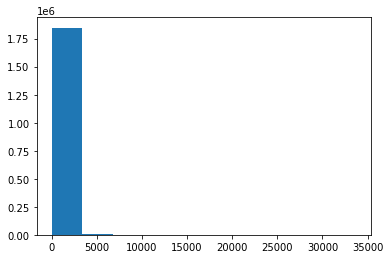

In [40]:
plt.hist([len(x) for x in final["Description"]], bins=10)

In [41]:
final.Description.describe()

count     1850262
unique    1083670
top              
freq       679107
Name: Description, dtype: object

In [42]:
final.dropna(inplace=True)
final.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826715 entries, 0 to 34758
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1826715 non-null  int32  
 1   Name             1826715 non-null  object 
 2   Authors          1826715 non-null  object 
 3   ISBN             1826715 non-null  object 
 4   Rating           1826715 non-null  float16
 5   PublishYear      1826715 non-null  int32  
 6   PublishMonth     1826715 non-null  int8   
 7   Publisher        1826715 non-null  object 
 8   RatingDist5      1826715 non-null  int32  
 9   RatingDist4      1826715 non-null  int32  
 10  RatingDist3      1826715 non-null  int32  
 11  RatingDist2      1826715 non-null  int32  
 12  RatingDist1      1826715 non-null  int32  
 13  RatingDistTotal  1826715 non-null  int32  
 14  CountsOfReview   1826715 non-null  int32  
 15  Description      1826715 non-null  object 
dtypes: float16(1), int32

In [43]:
final.to_csv("./goodreads_cleaned.csv", index=False)

Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


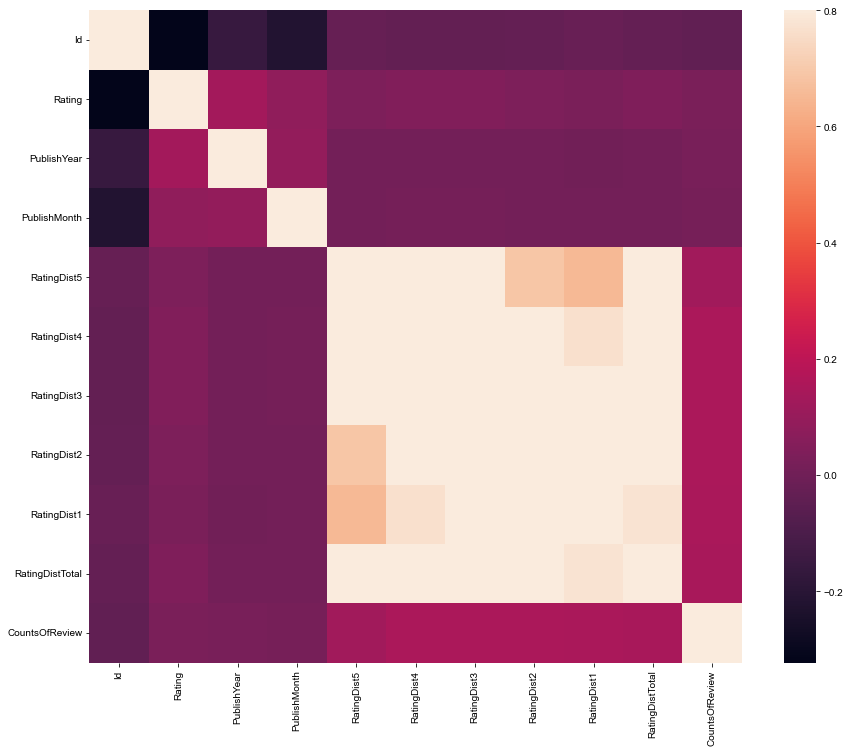

In [45]:
corrmatrix = final.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True)
sns.set(font_scale=0.8)